In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Чтение данных
data_full = pd.read_csv('/kaggle/input/boosting2/df_cleaned2.csv', sep=',')
print("Данные загружены")
data_full

Данные загружены


,Basic Sale,Category Position,Pics Count,Comments Valuation,Search position avg,Search words in ads,Category visibility,Category promo count,Size count in stock,Latest rating avg,...,char_count_sum,Area_ratio_yolov8x,Brightness,rot_h,rot_v,category_prod,log_Sales,log_Comments,log_Average_price,log_Frozen_stocks_cost
0,35,185,6,4.7,243,214,0,7,3,4.40,...,45,0.294715,116.235562,-0.097561,0.000508,clothes,9.000483,8.666819,6.238129,0.000000
1,55,2570,7,4.7,209,0,0,2,1,4.13,...,55,0.408784,198.144383,-0.095528,0.001016,clothes,8.811056,9.839482,5.102059,0.000000
2,32,0,15,4.8,147,535,0,0,4,5.00,...,68,0.572849,156.375583,-0.166667,0.001016,boots,4.406719,3.295837,8.733575,0.000000
3,24,0,16,4.8,309,10,0,0,6,5.00,...,66,0.527154,171.679395,-0.152439,0.002541,boots,3.663562,3.218876,8.794593,11.830906
4,80,0,9,4.6,48,731,0,0,5,3.75,...,138,0.359335,218.526324,-0.164634,-0.000508,boots,4.158883,4.595120,8.088780,10.684669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75997,43,119,9,4.9,146,307,0,3,0,4.07,...,66,0.341019,198.175255,0.001000,0.003500,cosmetics,11.068761,10.763420,5.110179,12.617291
75998,42,497,13,4.8,175,0,4,8,0,4.53,...,63,0.354866,140.595838,0.001000,0.003500,cosmetics,10.045638,9.877708,5.911880,13.172071
75999,40,562,15,4.8,148,227,0,7,0,4.00,...,128,0.314294,170.743481,0.001000,0.003500,cosmetics,9.794788,11.130215,5.507037,10.827766
76000,38,66,10,4.9,84,2677,9,7,0,4.47,...,79,0.295927,202.744981,0.001000,0.003500,cosmetics,7.735433,11.841034,6.886787,12.236180


In [2]:
# Разделение на подвыборки по категории товара
data_dict = {category: df for category, df in data_full.groupby("category_prod")}
print(f"Обнаружено {len(data_dict)} категорий")

feature_importances = {}

Обнаружено 6 категорий


[1/6] Обрабатывается категория: boots
Лучшие параметры для boots: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
Test MSE: 1.0572
Test R²: 0.6985
CV R² (5-fold): 0.6585


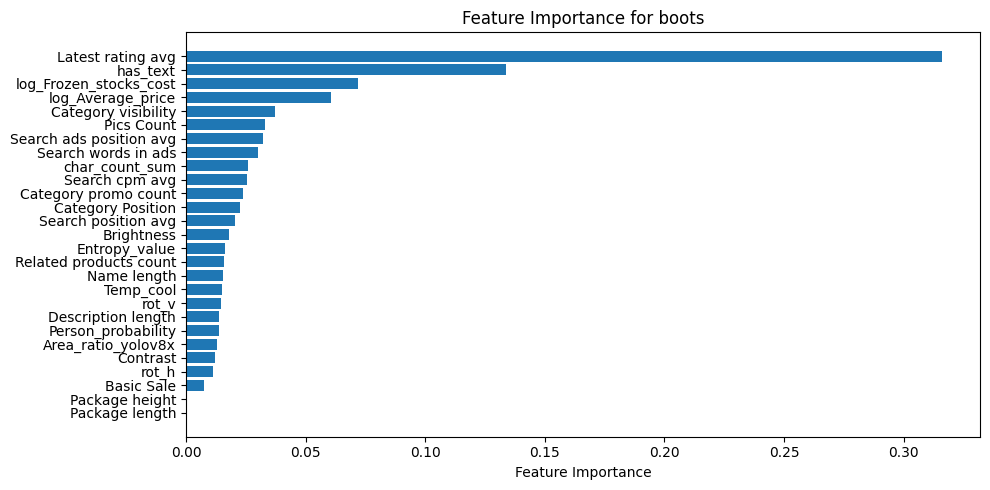

[2/6] Обрабатывается категория: clothes
Лучшие параметры для clothes: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Test MSE: 1.6969
Test R²: 0.6639
CV R² (5-fold): 0.6492


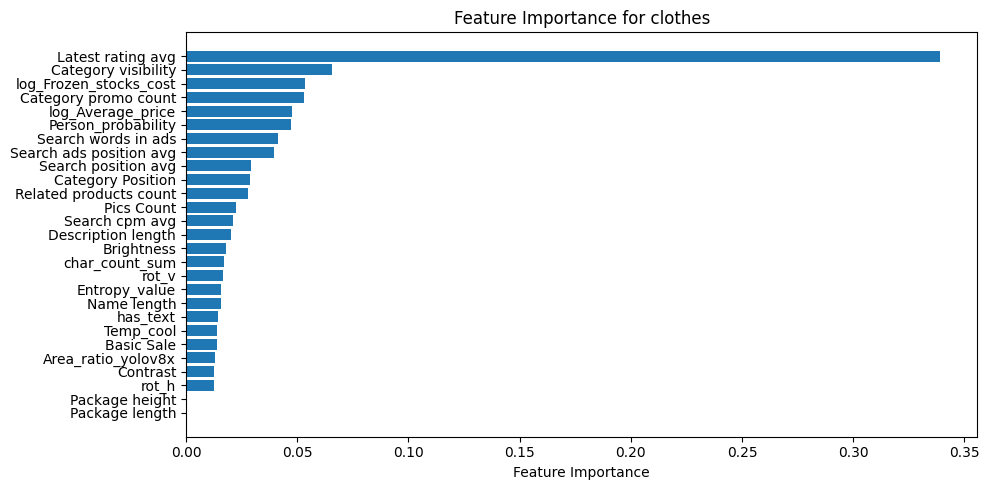

[3/6] Обрабатывается категория: cosmetics
Лучшие параметры для cosmetics: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
Test MSE: 2.1304
Test R²: 0.7960
CV R² (5-fold): 0.7779


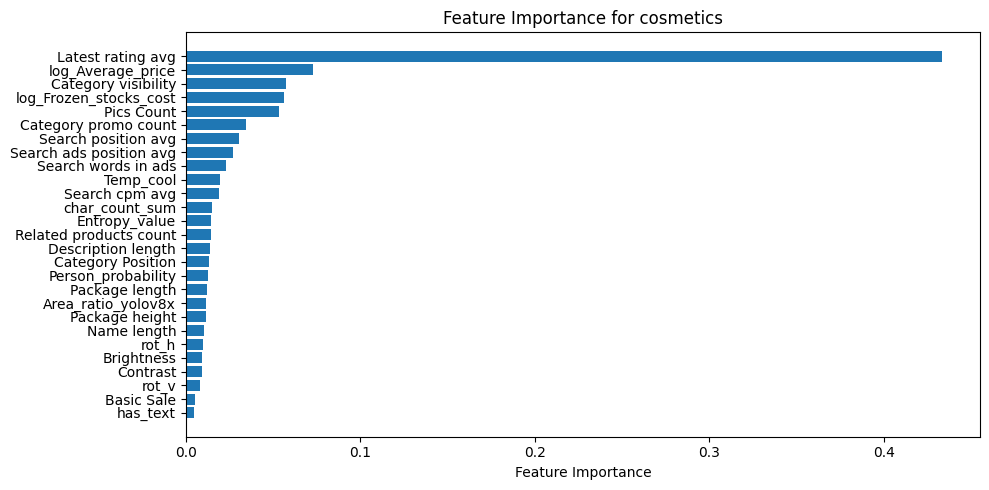

[4/6] Обрабатывается категория: electronics
Лучшие параметры для electronics: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
Test MSE: 1.0775
Test R²: 0.8631
CV R² (5-fold): 0.8290


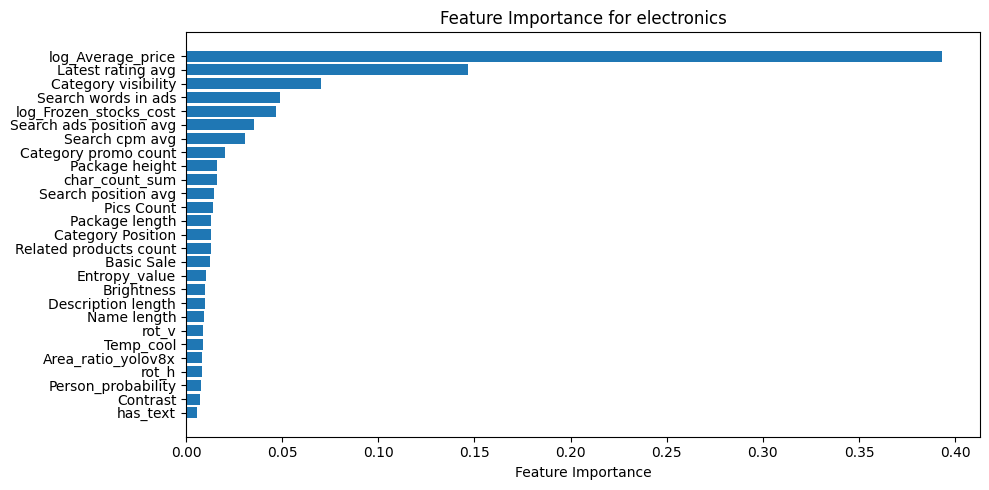

[5/6] Обрабатывается категория: food
Лучшие параметры для food: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
Test MSE: 1.5770
Test R²: 0.8528
CV R² (5-fold): 0.8092


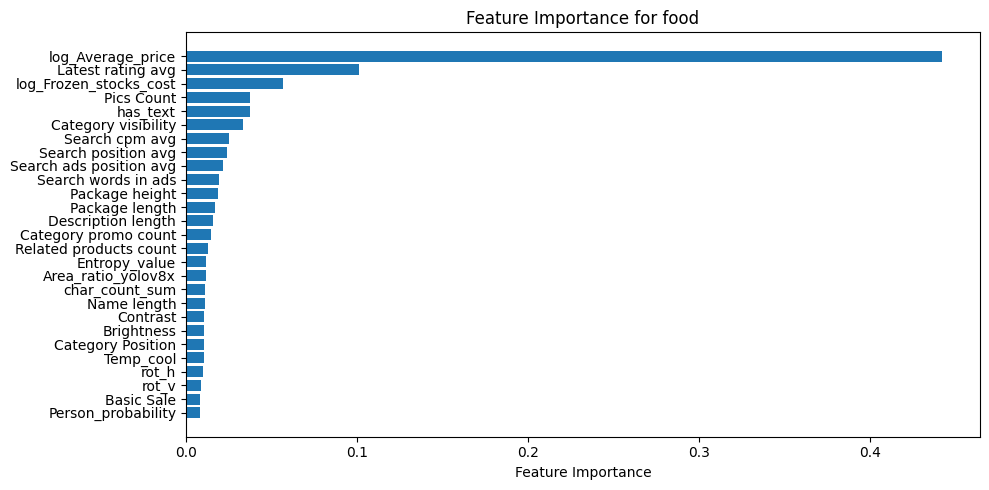

[6/6] Обрабатывается категория: home
Лучшие параметры для home: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
Test MSE: 1.9270
Test R²: 0.8399
CV R² (5-fold): 0.8109


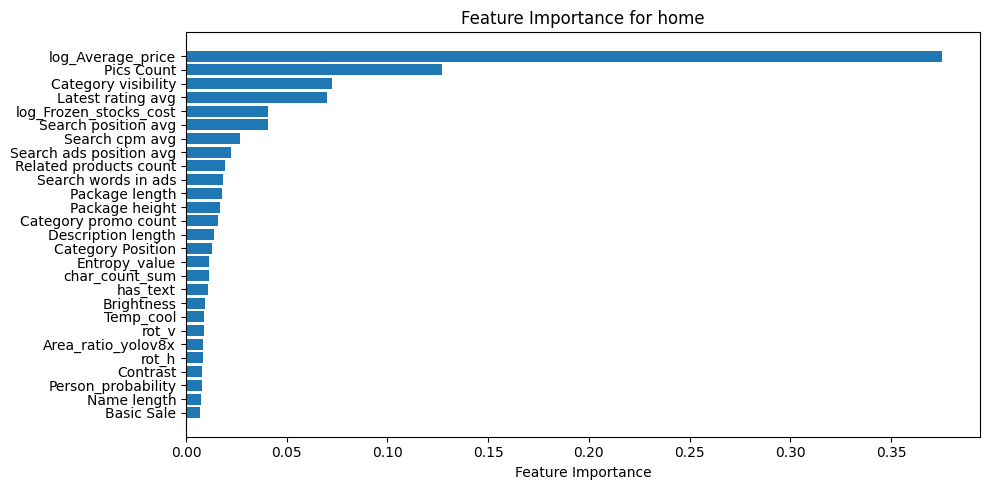


📊 Итоговая таблица метрик:
boots: MSE = 1.0572, R² = 0.6985, Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
clothes: MSE = 1.6969, R² = 0.6639, Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
cosmetics: MSE = 2.1304, R² = 0.7960, Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
electronics: MSE = 1.0775, R² = 0.8631, Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
food: MSE = 1.5770, R² = 0.8528, Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}
home: MSE = 1.9270, R² = 0.8399, Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 1.0}


In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Словари для хранения результатов
trained_models = {}
feature_importances = {}
mse_scores = {}
r2_scores = {}
best_params = {}

# Гиперпараметры для подбора
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Цикл по категориям
for i, (category, data) in enumerate(data_dict.items(), 1):
    print(f"[{i}/{len(data_dict)}] Обрабатывается категория: {category}")
    
    # Признаки и целевая переменная
    X = data.loc[:, ['Basic Sale', 'Category Position', 'Pics Count', 
                     'Search position avg', 'Search words in ads', 'Category visibility',
                     'Category promo count', 'Latest rating avg', 'Related products count',
                     'Search cpm avg', 'Search ads position avg', 'Description length',
                     'Name length', 'Package length', 'Package height', 'Brightness', 
                     'Contrast', 'Person_probability', 'Entropy_value', 'Temp_cool', 
                     'has_text', 'char_count_sum', 'Area_ratio_yolov8x', 
                     'rot_v','rot_h', 'log_Average_price', 'log_Frozen_stocks_cost']]
    
    y = data['log_Sales']
    
    # Делим на обучение и тест
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация базовой модели
    base_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_dist,
        n_iter=15,
        scoring='r2',
        cv=10,
        verbose=0,
        random_state=42,
        n_jobs=-1
    )

    # Поиск лучших гиперпараметров
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_params[category] = random_search.best_params_

    # Предсказание и метрики
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Кросс-валидация
    cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='r2')
    cv_mean_r2 = np.mean(cv_scores)

    # Сохраняем результаты
    trained_models[category] = best_model
    mse_scores[category] = mse
    r2_scores[category] = r2
    feature_importances[category] = best_model.feature_importances_

    print(f"Лучшие параметры для {category}: {random_search.best_params_}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R²: {r2:.4f}")
    print(f"CV R² (5-fold): {cv_mean_r2:.4f}")

    # Визуализация важности признаков
    plt.figure(figsize=(10, 5))
    sorted_idx = best_model.feature_importances_.argsort()
    plt.barh(X.columns[sorted_idx], best_model.feature_importances_[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance for {category}")
    plt.tight_layout()
    plt.show()

# Итоговые метрики
print("\n📊 Итоговая таблица метрик:")
for category in data_dict.keys():
    print(f"{category}: MSE = {mse_scores[category]:.4f}, R² = {r2_scores[category]:.4f}, Best Params: {best_params[category]}")

In [16]:
for category, importance in feature_importances.items():
    print(f"Feature importance for {category}:")
    selected_importance = {feature: imp for feature, imp in zip(X.columns, importance) if feature in ['Brightness', 'Contrast', 'Person_probability', 'Entropy_value', 'Temp_cool', 'has_text', 'char_count_sum', 'Area_ratio_yolov8x', 'rot_h', 'rot_v']}
    print(pd.Series(selected_importance).sort_values(ascending=False))

Feature importance for boots:
has_text              0.133736
char_count_sum        0.026125
Brightness            0.018144
Entropy_value         0.016210
Temp_cool             0.014873
rot_v                 0.014470
Person_probability    0.013760
Area_ratio_yolov8x    0.013024
Contrast              0.012130
rot_h                 0.011164
dtype: float32
Feature importance for clothes:
Person_probability    0.047038
Brightness            0.017894
char_count_sum        0.017130
rot_v                 0.016631
Entropy_value         0.015812
has_text              0.014216
Temp_cool             0.014145
Area_ratio_yolov8x    0.013203
Contrast              0.012702
rot_h                 0.012523
dtype: float32
Feature importance for cosmetics:
Temp_cool             0.019478
char_count_sum        0.014876
Entropy_value         0.014388
Person_probability    0.012614
Area_ratio_yolov8x    0.011321
rot_h                 0.009526
Brightness            0.009440
Contrast              0.009070
rot_v 